# Lab 5 - Machine Learning 
# Dimensionality reduction using Factor Analysis 

## Name: Jerin Mathew
## Roll No: 2139455

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [3]:
df = pd.read_csv('C:/ClassesMSC/DataSets/EFA.csv')
print(df.shape)
df.head()

(90, 14)


,Price,Safety,Exterior_Looks,Space_comfort,Technology,After_Sales_Service,Resale_Value,Fuel_Type,Fuel_Efficiency,Color,Maintenance,Test_drive,Product_reviews,Testimonials
0,4,4,5,4,3,4,5,4,4,2,4,2,4,3
1,3,5,3,3,4,4,3,4,3,4,3,2,2,2
2,4,4,3,4,5,5,5,4,5,4,5,4,4,3
3,4,4,4,3,3,4,5,5,4,4,4,2,5,3
4,5,5,4,4,5,4,5,3,4,5,5,5,5,2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Price                90 non-null     int64
 1   Safety               90 non-null     int64
 2   Exterior_Looks       90 non-null     int64
 3   Space_comfort        90 non-null     int64
 4   Technology           90 non-null     int64
 5   After_Sales_Service  90 non-null     int64
 6   Resale_Value         90 non-null     int64
 7   Fuel_Type            90 non-null     int64
 8   Fuel_Efficiency      90 non-null     int64
 9   Color                90 non-null     int64
 10  Maintenance          90 non-null     int64
 11  Test_drive           90 non-null     int64
 12  Product_reviews      90 non-null     int64
 13  Testimonials         90 non-null     int64
dtypes: int64(14)
memory usage: 10.0 KB


In [5]:
df.describe()

,Price,Safety,Exterior_Looks,Space_comfort,Technology,After_Sales_Service,Resale_Value,Fuel_Type,Fuel_Efficiency,Color,Maintenance,Test_drive,Product_reviews,Testimonials
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,4.166667,4.200000,3.822222,4.000000,4.155556,4.411111,3.677778,4.088889,3.866667,3.733333,3.988889,3.433333,4.133333,3.877778
std,0.585403,0.639522,0.815272,0.653427,0.872953,0.651609,1.216255,0.647284,0.823803,0.921650,0.771609,1.112240,0.889388,0.871880
min,3.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000
25%,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,2.250000,4.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.750000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
df.isnull().sum()

Price                  0
Safety                 0
Exterior_Looks         0
Space_comfort          0
Technology             0
After_Sales_Service    0
Resale_Value           0
Fuel_Type              0
Fuel_Efficiency        0
Color                  0
Maintenance            0
Test_drive             0
Product_reviews        0
Testimonials           0
dtype: int64

In [7]:
### Using Exploratory Factor Analysis to Create Segments

In [8]:
# Kaiser-Meyer-Olkin (KMO)

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)
kmo_model

0.6091437123668768

In [9]:
fa = FactorAnalyzer(rotation=None, n_factors=len(df.columns))
fa.fit(df)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([2.75506068, 2.1640701 , 1.46454689, 1.32990296, 1.04029066,
       0.99198697, 0.80634535, 0.68102944, 0.60136568, 0.5536899 ,
       0.51364695, 0.46653069, 0.35660717, 0.27492656])

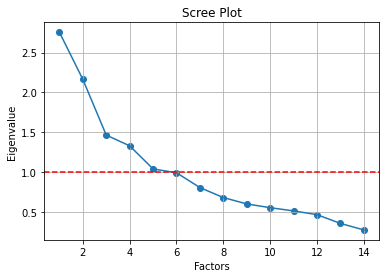

In [10]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

In [11]:
# Create Segments and Review Loadings

fa = FactorAnalyzer(rotation="varimax", n_factors=5)
fa.fit(df)

# Check loadings
loadings = pd.DataFrame(fa.loadings_)
loadings.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
loadings.index = df.columns
loadings

,Factor-1,Factor-2,Factor-3,Factor-4,Factor-5
Price,0.573617,0.146030,-0.045880,-0.040950,-0.019967
Safety,-0.276880,0.304749,-0.161114,0.112029,0.047257
Exterior_Looks,-0.007815,0.053317,0.197785,0.005544,-0.537709
Space_comfort,0.023073,0.869068,0.206912,0.004440,-0.170585
Technology,0.041581,0.318130,0.085799,0.125403,0.027299
After_Sales_Service,0.056866,0.372065,0.056598,0.877193,0.036841
Resale_Value,0.693702,-0.221781,-0.172206,0.164311,0.010156
Fuel_Type,0.060285,0.537086,-0.017494,0.084929,-0.036865
Fuel_Efficiency,0.464085,0.092215,0.277061,0.368666,0.226392
Color,0.209059,-0.053291,0.256304,0.069493,0.744462


In [12]:
# Segments

segments = loadings[loadings >= .4].fillna(loadings[loadings <= -.4])
segments

,Factor-1,Factor-2,Factor-3,Factor-4,Factor-5
Price,0.573617,NaN,NaN,NaN,NaN
Safety,NaN,NaN,NaN,NaN,NaN
Exterior_Looks,NaN,NaN,NaN,NaN,-0.537709
Space_comfort,NaN,0.869068,NaN,NaN,NaN
Technology,NaN,NaN,NaN,NaN,NaN
After_Sales_Service,NaN,NaN,NaN,0.877193,NaN
Resale_Value,0.693702,NaN,NaN,NaN,NaN
Fuel_Type,NaN,0.537086,NaN,NaN,NaN
Fuel_Efficiency,0.464085,NaN,NaN,NaN,NaN
Color,NaN,NaN,NaN,NaN,0.744462


In [13]:
segment_names = ['Overall Cost', 'Comfort and Fuel Efficiency', 'Review Confirmer', 'Service', 'Color Trumps All']
segments.columns = segment_names
segments

,Overall Cost,Comfort and Fuel Efficiency,Review Confirmer,Service,Color Trumps All
Price,0.573617,NaN,NaN,NaN,NaN
Safety,NaN,NaN,NaN,NaN,NaN
Exterior_Looks,NaN,NaN,NaN,NaN,-0.537709
Space_comfort,NaN,0.869068,NaN,NaN,NaN
Technology,NaN,NaN,NaN,NaN,NaN
After_Sales_Service,NaN,NaN,NaN,0.877193,NaN
Resale_Value,0.693702,NaN,NaN,NaN,NaN
Fuel_Type,NaN,0.537086,NaN,NaN,NaN
Fuel_Efficiency,0.464085,NaN,NaN,NaN,NaN
Color,NaN,NaN,NaN,NaN,0.744462


In [14]:
# Communalities

communalities = fa.get_communalities()
communalities = pd.DataFrame(communalities, index=df.T.index, columns=['communalities'])
communalities.sort_values(by=['communalities'], ascending=True).head(8)

,communalities
Technology,0.126768
Safety,0.210276
Test_drive,0.255127
Fuel_Type,0.300974
Exterior_Looks,0.331185
Price,0.354542
Product_reviews,0.358419
Maintenance,0.451093


<AxesSubplot:>

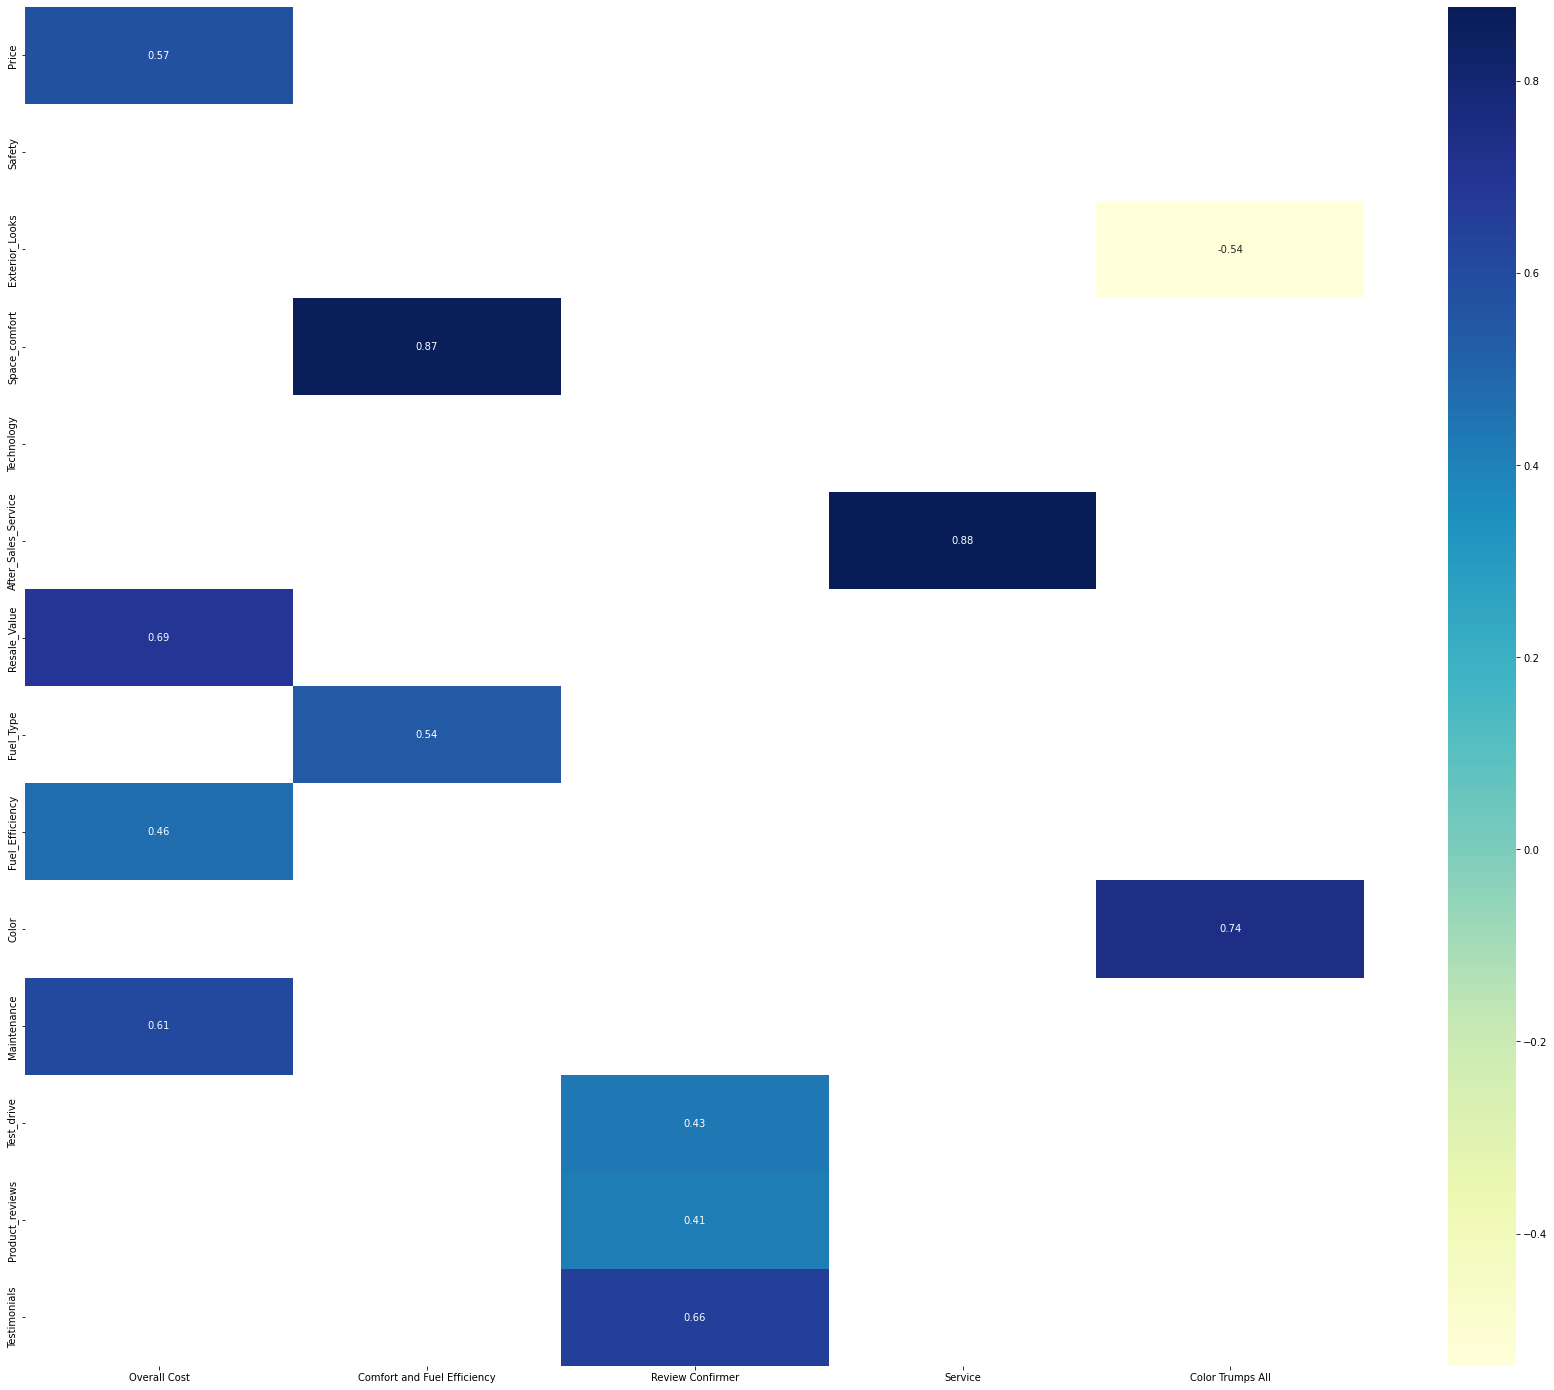

In [15]:
#Heatmap of loadings
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30,25))
sns.heatmap(segments, annot=True, cmap="YlGnBu")

In [16]:
### Check Variance and Do Adequacy checks 

In [17]:
# Check variance
factorVariance = pd.DataFrame(fa.get_factor_variance())
factorVariance.rename(columns = lambda x: 'Factor-' + str(x + 1), inplace=True)
factorVariance.index = ['SS Loadings', 'Proportion Variance', 'Cumulative Variance']
factorVariance

,Factor-1,Factor-2,Factor-3,Factor-4,Factor-5
SS Loadings,1.716492,1.503685,1.085603,1.035058,1.002343
Proportion Variance,0.122607,0.107406,0.077543,0.073933,0.071596
Cumulative Variance,0.122607,0.230013,0.307556,0.381488,0.453084


In [18]:
df['Respondent_ID'] = df.index
df.head()

,Price,Safety,Exterior_Looks,Space_comfort,Technology,After_Sales_Service,Resale_Value,Fuel_Type,Fuel_Efficiency,Color,Maintenance,Test_drive,Product_reviews,Testimonials,Respondent_ID
0,4,4,5,4,3,4,5,4,4,2,4,2,4,3,0
1,3,5,3,3,4,4,3,4,3,4,3,2,2,2,1
2,4,4,3,4,5,5,5,4,5,4,5,4,4,3,2
3,4,4,4,3,3,4,5,5,4,4,4,2,5,3,3
4,5,5,4,4,5,4,5,3,4,5,5,5,5,2,4


In [22]:
# Correlation matrix
correlation_export = df.corr().unstack().reset_index(name='value')
correlation_export.columns = ['Feature 1', 'Feature 2', 'Value']
correlation_export.to_csv('Correlations.csv', index=False)
correlation_export

,Feature 1,Feature 2,Value
0,Price,Price,1.000000
1,Price,Safety,-0.090037
2,Price,Exterior_Looks,0.015695
3,Price,Space_comfort,0.117495
4,Price,Technology,0.014658
...,...,...,...
220,Respondent_ID,Maintenance,-0.261696
221,Respondent_ID,Test_drive,0.135921
222,Respondent_ID,Product_reviews,0.143139
223,Respondent_ID,Testimonials,0.428422


In [21]:
# Loadings

loadings.columns = segment_names
loadings_export = loadings.unstack().reset_index(name='value')
loadings_export.columns = ['Segment', 'Feature', 'Value']
loadings_export.to_csv('Loadings.csv', index=False)
loadings_export

,Segment,Feature,Value
0,Overall Cost,Price,0.573617
1,Overall Cost,Safety,-0.276880
2,Overall Cost,Exterior_Looks,-0.007815
3,Overall Cost,Space_comfort,0.023073
4,Overall Cost,Technology,0.041581
...,...,...,...
65,Color Trumps All,Color,0.744462
66,Color Trumps All,Maintenance,0.249332
67,Color Trumps All,Test_drive,-0.074495
68,Color Trumps All,Product_reviews,0.066425
